notes for farzan

Slide 3 add figures

In [3]:
import os
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score,roc_auc_score
import pandas as pd
from scipy.special import softmax
import numpy as np
dataset2label = {
    "personal": ["tpa", "oa", "ra"],
    "ucc": ["antagonize", "condescending", "hostile"],
    "ghc":     ["vo", "hd", "cv"],
    "imdb":     ["sentiment"],
    "agnews":     ["category"],
    "arabic":     ["abuse"],
    "chinese":     ["offensive"],
    "russian":     ["toxicity"],
    "english":     ["hate"],
    "albanian":     ["offensive"],
    "danish":     ["offensive"],
    "estonian": ["moderated"],
    "german": ["offensive"],
    "greek": ["offensive"],
    "italian": ["hate"],
    "latvian": ["moderated"],
    "portuguese": ["hate"],
    "turkish": ["offensive"],
    "ukraninan": ["abusive"],
    "hindi": ["hate"],

}

In [15]:
experiment_dir = "../experiments/"
langs = ["hindi", "ukraninan", "turkish", "portuguese", "latvian", "italian", "greek", "german", "estonian", "danish", "albanian", "arabic", "english", "russian", "chinese"]
limit = 1000
lm = "xlm-roberta-base"
print(os.listdir(experiment_dir))

aux_langs = []
target_langs = []
limits = []
f1s = []
aucs=[]
def get_auc(df):
    def apply_softmax(row):
        return softmax(row)

# Apply softmax to the 'logit_0' and 'logit_1' columns
    df[['logit_0_softmax', 'logit_1_softmax']] = df[['logit_0', 'logit_1']].apply(apply_softmax, axis=1, result_type='expand')

    true_labels = df['labels']
    
    

# Compute AUC
    auc = roc_auc_score(true_labels, df["logit_1_softmax"])
    return auc

for i in range(len(langs)):
    l1 = "-"
    l2 = langs[i]
    curr_exp =  f"first-{l2}-{dataset2label[l2][0]}-{limit}-{lm}"
    curr_dir = os.path.join(experiment_dir, curr_exp)
    if not os.path.exists(os.path.join(curr_dir, "test_preds.csv")):
        print("missing", curr_dir)
    else:
        aux_langs.append(l1)

        target_langs.append(l2)
        limits.append(limit)
        test_df = pd.read_csv(os.path.join(curr_dir, "test_preds.csv"))
        test_f1 = f1_score(test_df["labels"], test_df["preds"])
        f1s.append(test_f1)
        aucs.append(get_auc(test_df))

    
    for j in range(len(langs)):
        if i ==j:
            continue
        l1 = langs[i]
        l2 = langs[j]
        curr_exp =  f"first-{l1}-second-{l2}-{dataset2label[l2][0]}-{limit}-{lm}"
        curr_dir = os.path.join(experiment_dir, curr_exp)
        if not os.path.exists(os.path.join(curr_dir, "test_preds.csv")):
            # print("missing", curr_dir)
            continue
        aux_langs.append(l1)
        target_langs.append(l2)
        limits.append(limit)
        test_df = pd.read_csv(os.path.join(curr_dir, "test_preds.csv"))
        test_f1 = f1_score(test_df["labels"], test_df["preds"])
        f1s.append(test_f1)
        aucs.append(get_auc(test_df))

        
        # print(os.listdir(temp))



# [os.listdir(os.path.join(experiment_dir, f))[0] for f in os.listdir(experiment_dir)]


['first-italian-hate-1000-xlm-roberta-base', 'first-danish-offensive-1000-xlm-roberta-base', 'first-latvian-moderated-1000-xlm-roberta-base', 'first-albanian-offensive-1000-xlm-roberta-base', 'first-arabic-abuse-1000-xlm-roberta-base', 'first-chinese-offensive-1000-xlm-roberta-base', 'first-hindi-hate-1000-xlm-roberta-base', 'first-turkish-hate-1000-xlm-roberta-base', 'v1', 'first-greek-offensive-1000-xlm-roberta-base', 'first-portuguese-hate-1000-xlm-roberta-base', 'first-ukraninan-offensive-1000-xlm-roberta-base', 'first-german-offensive-1000-xlm-roberta-base', 'first-estonian-moderated-1000-xlm-roberta-base', 'first-russian-toxicity-1000-xlm-roberta-base', 'first-english-hate-1000-xlm-roberta-base']
missing ../experiments/first-ukraninan-abusive-1000-xlm-roberta-base
missing ../experiments/first-turkish-offensive-1000-xlm-roberta-base


In [99]:
from tabulate import tabulate


In [105]:
latex_table = tabulate(temp[temp.aux_lang!="-"][["aux_lang", "target_lang", "delta_auc"]], tablefmt="latex_raw", headers="keys", showindex=False,  floatfmt=(".4f", ".4f", ".4f"))
print(latex_table)


\begin{tabular}{llr}
\hline
 aux_lang   & target_lang   &   delta_auc \\
\hline
 hindi      & ukraninan     &      0.0080 \\
 hindi      & turkish       &      0.0466 \\
 hindi      & portuguese    &     -0.0134 \\
 hindi      & latvian       &     -0.0220 \\
 hindi      & italian       &     -0.0134 \\
 hindi      & greek         &      0.0466 \\
 hindi      & german        &      0.0466 \\
 hindi      & estonian      &     -0.0220 \\
 hindi      & danish        &      0.0466 \\
 hindi      & albanian      &      0.0466 \\
 hindi      & arabic        &      0.0138 \\
 hindi      & english       &     -0.0134 \\
 hindi      & russian       &     -0.0295 \\
 hindi      & chinese       &      0.0466 \\
 ukraninan  & hindi         &     -0.0092 \\
 ukraninan  & turkish       &      0.0354 \\
 ukraninan  & portuguese    &     -0.0092 \\
 ukraninan  & latvian       &      0.0140 \\
 ukraninan  & italian       &     -0.0092 \\
 ukraninan  & greek         &      0.0354 \\
 ukraninan  & german

In [12]:
df = pd.DataFrame( {"target_lang": target_langs, "aux_lang": aux_langs, "limit": limits, "auc":aucs, "f1": f1s})
# df.to_csv("../results/pilot-4lang.csv", index=False)
df

,target_lang,aux_lang,limit,auc,f1
0,hindi,-,1000,0.804711,0.0
1,portuguese,-,1000,0.804711,0.0
2,latvian,-,1000,0.634692,0.0
3,italian,-,1000,0.804711,0.0
4,german,-,1000,0.575711,0.0
...,...,...,...,...,...
78,danish,russian,1000,0.590105,0.0
79,albanian,russian,1000,0.590105,0.0
80,arabic,russian,1000,0.619689,0.0
81,english,russian,1000,0.807232,0.0


In [4]:
raw_df = pd.read_csv("../results/pilot-15lang.csv")

In [7]:
temp = raw_df
temp["delta_auc"] = temp.apply(lambda x: x["auc"] - single_perf_dict[x["target_lang"]], axis=1)


In [11]:
temp[["aux_lang", "target_lang", "delta_auc"]].to_csv("alireza_delta_15lang.csv", index=False)

In [65]:
temp.columns

Index(['target_lang', 'aux_lang', 'limit', 'auc', 'f1', 'delta_auc'], dtype='object')

In [1]:
temp

NameError: name 'temp' is not defined

/tmp/ipykernel_3747388/19063533.py:6: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(temp[temp['aux_lang'] == lang]['delta_auc'], label=lang)


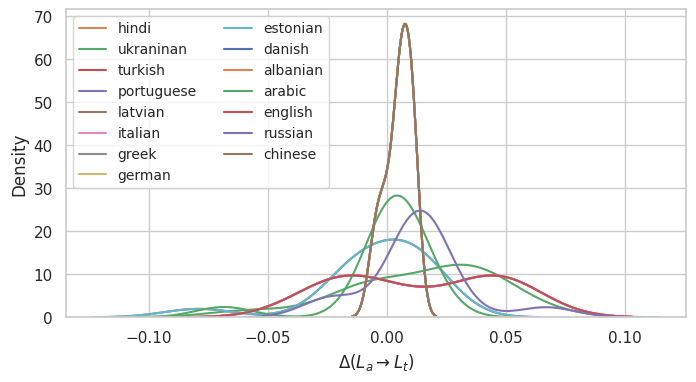

In [97]:
sns.set(style="whitegrid")
plt.figure(figsize=(8, 4))

# Use the 'target_lang' variable to color different distribution lines
for lang in temp['aux_lang'].unique():
    sns.kdeplot(temp[temp['aux_lang'] == lang]['delta_auc'], label=lang)

# Set plot labels and title
plt.xlabel(r'$\Delta (L_a \rightarrow L_t)$')
plt.ylabel('Density')
# plt.title(r'Distribution of $\Delta (L_a \rightarrow L_t)$ AUC by Auxiliary Language $L_a$')

# Show the legend
plt.legend(loc='upper left', bbox_to_anchor=(0, 1), fontsize='small', ncol=2)
plt.savefig('distribution_plot.png', format='png', dpi=300, bbox_inches='tight')




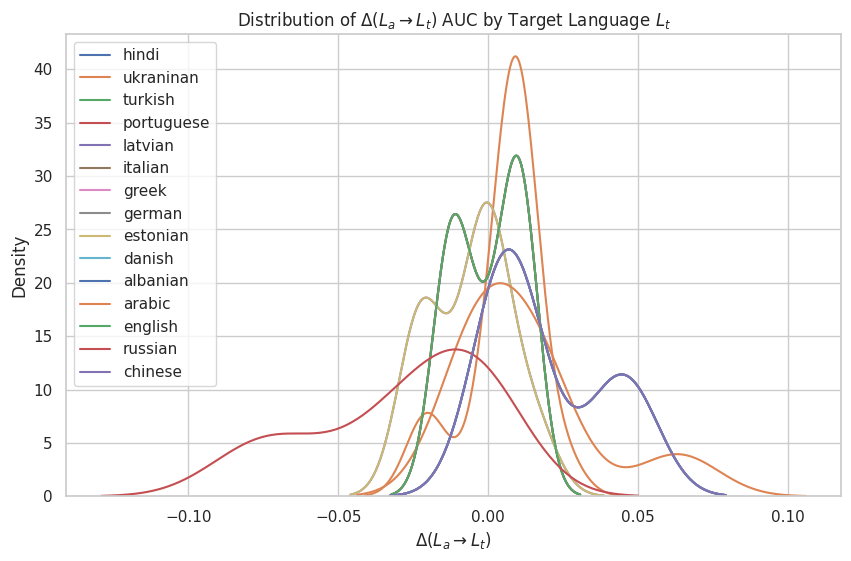

In [86]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

# Use the 'target_lang' variable to color different distribution lines
for lang in temp['target_lang'].unique():
    sns.kdeplot(temp[temp['target_lang'] == lang]['delta_auc'], label=lang)

# Set plot labels and title
plt.xlabel(r'$\Delta (L_a \rightarrow L_t)$')
plt.ylabel('Density')
plt.title(r'Distribution of $\Delta (L_a \rightarrow L_t)$ AUC by Target Language $L_t$')

# Show the legend
plt.legend(loc='upper left')
plt.savefig('distribution_plot.pdf', format='pdf', dpi=300, bbox_inches='tight')




<Axes: xlabel='delta_auc', ylabel='Density'>

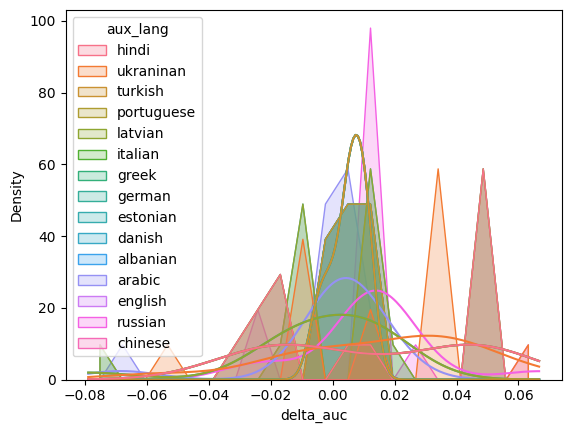

In [77]:
sns.histplot(data=temp[temp.aux_lang!="-"], x='delta_auc', hue='aux_lang', kde=True, element="step", common_norm=False, stat="density", bins=20)


In [69]:
temp[temp.target_lang=="english"]

,target_lang,aux_lang,limit,auc,f1,delta_auc
12,english,hindi,1000,0.850093,0.278481,-0.013441
27,english,ukraninan,1000,0.854300,0.167273,-0.009234
42,english,turkish,1000,0.873639,0.398922,0.010106
57,english,portuguese,1000,0.850093,0.278481,-0.013441
72,english,latvian,1000,0.852614,0.000000,-0.010920
87,english,italian,1000,0.850093,0.278481,-0.013441
102,english,greek,1000,0.873639,0.398922,0.010106
117,english,german,1000,0.873639,0.398922,0.010106
132,english,estonian,1000,0.852614,0.000000,-0.010920
147,english,danish,1000,0.873639,0.398922,0.010106


In [52]:
plot_df = pd.merge(temp, all_farzan_df, on=["target_lang", "aux_lang"])
plot_df

,target_lang,aux_lang,limit,auc_x,f1_x,delta_auc_x,Language Pair,auc_y,f1_y,l_distance,target_cultural_index,aux_cultural_index,cultural_distance,Indi_score_1,Indi_score_2,indi_score_distance,single-task-avg-auc,delta_auc_y,l1,l2
0,ukraninan,hindi,1000,0.832023,0.666667,0.007977,hindi-ukraninan,0.832023,0.666667,67.9,0.110000,0.110,0.000000,48,25,23,0.843790,-0.011767,hindi,ukraninan
1,ukraninan,hindi,1000,0.832023,0.666667,0.007977,hindi-ukraninan,0.832023,0.666667,67.9,0.110000,0.110,0.000000,48,25,23,0.843790,-0.011767,hindi,ukraninan
2,turkish,hindi,1000,0.783496,0.412241,0.046584,hindi-turkish,0.783496,0.412241,81.3,0.126667,0.110,0.016667,48,37,11,0.800223,-0.016727,hindi,turkish
3,turkish,hindi,1000,0.783496,0.412241,0.046584,hindi-turkish,0.783496,0.412241,81.3,0.126667,0.110,0.016667,48,37,11,0.800223,-0.016727,hindi,turkish
4,portuguese,hindi,1000,0.850093,0.278481,-0.013441,hindi-portuguese,0.850093,0.278481,60.4,0.076667,0.110,0.033333,48,27,21,0.863534,-0.013441,hindi,portuguese
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205,danish,chinese,1000,0.742432,0.008403,0.005520,chinese-danish,0.742432,0.008403,84.3,0.152500,0.135,0.017500,20,74,54,0.736912,0.005520,chinese,danish
206,english,chinese,1000,0.873639,0.398922,0.010106,chinese-english,0.783496,0.412241,84.9,0.152500,0.000,0.152500,20,91,71,0.800223,-0.016727,chinese,english
207,english,chinese,1000,0.873639,0.398922,0.010106,chinese-english,0.783496,0.412241,84.9,0.152500,0.000,0.152500,20,91,71,0.800223,-0.016727,chinese,english
208,russian,chinese,1000,0.816580,0.469136,-0.005144,chinese-russian,0.751001,0.395509,85.6,0.152500,0.125,0.027500,20,35,15,0.779318,-0.028317,chinese,russian


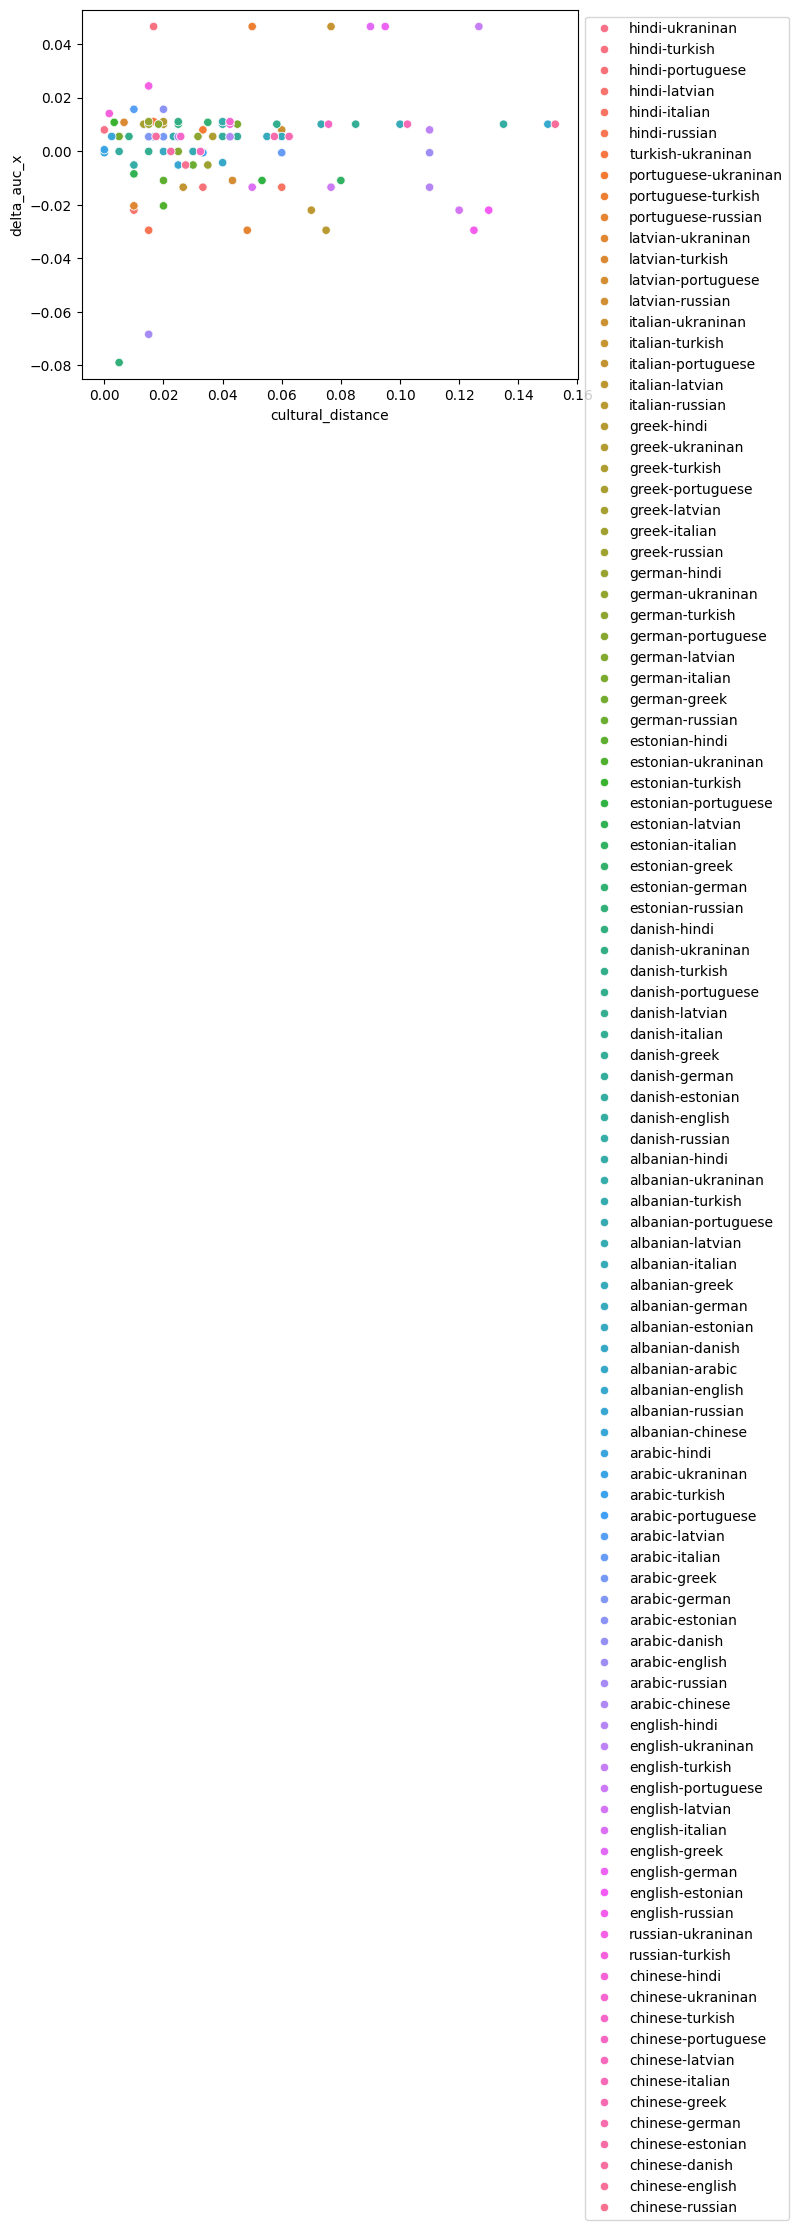

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(x="cultural_distance", y="delta_auc_x", hue="Language Pair", data=plot_df)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))



In [61]:
import statsmodels.api as sm

# Assuming plot_df is your DataFrame
X = plot_df[["cultural_distance", "l_distance"]]  # Independent variables
y = plot_df["delta_auc_x"]  # Dependent variable

# Add a constant term to the independent variables matrix
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X).fit()

# Print the regression summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            delta_auc_x   R-squared:                       0.031
Model:                            OLS   Adj. R-squared:                  0.022
Method:                 Least Squares   F-statistic:                     3.347
Date:                Thu, 01 Feb 2024   Prob (F-statistic):             0.0371
Time:                        14:55:22   Log-Likelihood:                 523.98
No. Observations:                 210   AIC:                            -1042.
Df Residuals:                     207   BIC:                            -1032.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.0119      0.00

In [38]:
for group in temp.groupby("target_lang"):
    print(group)
    print("------")

('albanian',     target_lang    aux_lang  limit       auc        f1  delta_auc
10     albanian       hindi   1000  0.783496  0.412241   0.046584
25     albanian   ukraninan   1000  0.772350  0.426117   0.035438
40     albanian     turkish   1000  0.742432  0.008403   0.005520
55     albanian  portuguese   1000  0.783496  0.412241   0.046584
70     albanian     latvian   1000  0.747702  0.243632   0.010790
85     albanian     italian   1000  0.783496  0.412241   0.046584
100    albanian       greek   1000  0.742432  0.008403   0.005520
115    albanian      german   1000  0.742432  0.008403   0.005520
130    albanian    estonian   1000  0.747702  0.243632   0.010790
145    albanian      danish   1000  0.742432  0.008403   0.005520
150    albanian           -   1000  0.736912  0.000000   0.000000
176    albanian      arabic   1000  0.742327  0.208716   0.005414
191    albanian     english   1000  0.783496  0.412241   0.046584
206    albanian     russian   1000  0.751001  0.395509   0.0140

In [6]:
single_perf_dict = {}
for row in raw_df[raw_df["aux_lang"] == "-"].iterrows():
    # print(row)
    single_perf_dict[row[1]["target_lang"]] = row[1]["auc"]
    
print(single_perf_dict)
raw_df[raw_df["aux_lang"] == "-"]


{'hindi': 0.863533968185131, 'ukraninan': 0.8240455840455841, 'turkish': 0.7369124076314527, 'portuguese': 0.863533968185131, 'latvian': 0.6296957240727616, 'italian': 0.863533968185131, 'greek': 0.7369124076314527, 'german': 0.7369124076314527, 'estonian': 0.6296957240727616, 'danish': 0.7369124076314527, 'albanian': 0.7369124076314527, 'arabic': 0.7454635486550379, 'english': 0.863533968185131, 'russian': 0.8217237308146399, 'chinese': 0.7369124076314527}


,target_lang,aux_lang,limit,auc,f1
0,hindi,-,1000,0.863534,0.086614
15,ukraninan,-,1000,0.824046,0.592593
30,turkish,-,1000,0.736912,0.000000
45,portuguese,-,1000,0.863534,0.086614
60,latvian,-,1000,0.629696,0.000000
75,italian,-,1000,0.863534,0.086614
90,greek,-,1000,0.736912,0.000000
105,german,-,1000,0.736912,0.000000
120,estonian,-,1000,0.629696,0.000000
135,danish,-,1000,0.736912,0.000000


In [21]:
farzan_df = pd.read_csv("../results/d_ali_acl_2.csv")
farzan_df["single-task-avg-auc"] = farzan_df["Language Pair"].apply(lambda x: (single_perf_dict[x.split("-")[0]] +  single_perf_dict[x.split("-")[1]])/2)
farzan_df["delta_auc"] = farzan_df["auc"]-farzan_df["single-task-avg-auc"]
farzan_df.to_csv("../results/delta_15lang_farzan.csv", index=False)

,Language Pair,auc,f1,l_distance,target_cultural_index,aux_cultural_index,cultural_distance,Indi_score_1,Indi_score_2,indi_score_distance,single-task-avg-auc,delta_auc
0,albanian-arabic,0.741199,0.000000,83.2,0.110000,0.150000,0.040000,20,38,18,0.741188,0.000011
1,albanian-chinese,0.742432,0.008403,77.3,0.152500,0.150000,0.002500,20,20,0,0.736912,0.005520
2,albanian-danish,0.742432,0.008403,70.6,0.150000,0.135000,0.015000,20,74,54,0.736912,0.005520
3,albanian-english,0.873639,0.398922,69.2,0.000000,0.150000,0.150000,20,91,71,0.800223,0.073416
4,albanian-estonian,0.747702,0.243632,85.2,0.150000,0.130000,0.020000,20,60,40,0.683304,0.064398
...,...,...,...,...,...,...,...,...,...,...,...,...
100,portuguese-turkish,0.873639,0.398922,85.0,0.076667,0.126667,0.050000,27,37,10,0.800223,0.073416
101,portuguese-ukraninan,0.854300,0.167273,56.1,0.076667,0.110000,0.033333,27,25,2,0.843790,0.010511
102,russian-turkish,0.816580,0.469136,75.3,0.125000,0.126667,0.001667,35,37,2,0.779318,0.037261
103,russian-ukraninan,0.765475,0.473684,7.0,0.125000,0.110000,0.015000,35,25,10,0.822885,-0.057410


In [43]:
farzan_df["target_lang"] = farzan_df["Language Pair"].apply(lambda x: x.split("-")[0])
farzan_df["aux_lang"] = farzan_df["Language Pair"].apply(lambda x: x.split("-")[1])
duplicate_df = farzan_df
duplicate_df["target_lang"] = farzan_df["Language Pair"].apply(lambda x: x.split("-")[1])
duplicate_df["aux_lang"] = farzan_df["Language Pair"].apply(lambda x: x.split("-")[0])
all_farzan_df = pd.concat([farzan_df, duplicate_df])
all_farzan_df

,Language Pair,auc,f1,l_distance,target_cultural_index,aux_cultural_index,cultural_distance,Indi_score_1,Indi_score_2,indi_score_distance,single-task-avg-auc,delta_auc,l1,l2,target_lang,aux_lang
0,albanian-arabic,0.741199,0.000000,83.2,0.110000,0.150000,0.040000,20,38,18,0.741188,0.000011,albanian,arabic,arabic,albanian
1,albanian-chinese,0.742432,0.008403,77.3,0.152500,0.150000,0.002500,20,20,0,0.736912,0.005520,albanian,chinese,chinese,albanian
2,albanian-danish,0.742432,0.008403,70.6,0.150000,0.135000,0.015000,20,74,54,0.736912,0.005520,albanian,danish,danish,albanian
3,albanian-english,0.873639,0.398922,69.2,0.000000,0.150000,0.150000,20,91,71,0.800223,0.073416,albanian,english,english,albanian
4,albanian-estonian,0.747702,0.243632,85.2,0.150000,0.130000,0.020000,20,60,40,0.683304,0.064398,albanian,estonian,estonian,albanian
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,portuguese-turkish,0.873639,0.398922,85.0,0.076667,0.126667,0.050000,27,37,10,0.800223,0.073416,portuguese,turkish,turkish,portuguese
101,portuguese-ukraninan,0.854300,0.167273,56.1,0.076667,0.110000,0.033333,27,25,2,0.843790,0.010511,portuguese,ukraninan,ukraninan,portuguese
102,russian-turkish,0.816580,0.469136,75.3,0.125000,0.126667,0.001667,35,37,2,0.779318,0.037261,russian,turkish,turkish,russian
103,russian-ukraninan,0.765475,0.473684,7.0,0.125000,0.110000,0.015000,35,25,10,0.822885,-0.057410,russian,ukraninan,ukraninan,russian


In [15]:
(single_perf_dict["albanian"]+single_perf_dict["arabic"])/2

0.7411879781432453

In [10]:
curr_exp in os.listdir(experiment_dir)

curr_exp

'fist-arabic-second-english-hate-1000-xlm-roberta-base'

In [ ]:
import re

# Assuming your file is named 'logfile.txt'
file_path = 'logfile.txt'

# Read the last line of the file
with open(file_path, 'r') as file:
    last_line = file.readlines()[-1]

# Extract the value of 'test/f1' using regular expression
match = re.search(r"'test/f1': (\d+\.\d+)", last_line)

if match:
    test_f1_value = float(match.group(1))
    print(f'The value of test/f1 is: {test_f1_value}')
else:
    print("Couldn't find 'test/f1' in the last line of the file.")
